<a href="https://colab.research.google.com/github/Javsk891/Air-Quality-Medell-n/blob/main/Prueba_Tecnica_Javier_Gonz%C3%A1lez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba Tecnica Data Analyst Specialist

In [ ]:
# Acceder de forma automatizada al los datos alojados en el siguiente repositorio de github https://github.com/CamiloZapataXaxis/pruebaDS

import os

# Clone the repository
!git clone https://github.com/CamiloZapataXaxis/pruebaDS

# Change directory to the repository
os.chdir('/content/pruebaDS')

# List the files in the repository
!ls


Cloning into 'pruebaDS'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 3.59 MiB | 2.50 MiB/s, done.
costos.csv  k_data.csv	Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario.txt  pruebaDS


In [ ]:
# Traer en forma de dataframe los dos archivos csv del repositorio que acabamos de acceder

import pandas as pd

# Read the first CSV file
costos = pd.read_csv('costos.csv')

# Read the second CSV file
k_data = pd.read_csv('k_data.csv')

In [ ]:
# Visualizamos el datset costos.csv
costos.tail()

,KPI,FORMATO,COSTO,METRICA
0,CPM,RichMedia,10 / 1000,Impressions
1,CPM,SONA,5 / 1000,Impressions
2,CPM,StandarBanners,3 / 1000,Impressions
3,CPCV,VideoIntegrado,0.03,Complete Views
4,CPC,SONA,10,clicks


In [ ]:
# Se observa en detalle los nombres de las columnas y los tipos de datos para el dataset costos.csv
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   KPI      5 non-null      object
 1   FORMATO  5 non-null      object
 2   COSTO    5 non-null      object
 3   METRICA  5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [ ]:
# Visualizamos el dataset k_data.csv
k_data.head()

,Date,Campaign,Insertion Order,Creative,Creative Size,Media Type,City,Impressions,Clicks,TrueView: Views,Complete Views (Video)
0,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acajete,1,0,0,0
1,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acambaro,6,0,0,0
2,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acapulco,2,0,0,0
3,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apatzingan,1,0,0,0
4,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apodaca,2,0,0,0


In [ ]:
# Se observa en detalle los nombres de las columnas y los tipos de datos para el dataset costos.csv
k_data.info() # Se observa que el dataset no tiene datos faltantes, asì que se presume de su integridad para realizar los análisis que siguen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345414 entries, 0 to 345413
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Date                    345414 non-null  object
 1   Campaign                345414 non-null  object
 2   Insertion Order         345414 non-null  object
 3   Creative                345414 non-null  object
 4   Creative Size           345414 non-null  object
 5   Media Type              345414 non-null  object
 6   City                    345414 non-null  object
 7   Impressions             345414 non-null  int64 
 8   Clicks                  345414 non-null  int64 
 9   TrueView: Views         345414 non-null  int64 
 10  Complete Views (Video)  345414 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 29.0+ MB


#2. Usando comandos de python, determina a partir de los datos el Media Type con mayor número de impresiones sumadas en todo el periodo.

In [ ]:
# Numero de impresiones en por Media Type
grouped_df = k_data.groupby('Media Type')['Impressions'].sum()
grouped_df

Media Type
Display    23614478
Video       4858645
Name: Impressions, dtype: int64

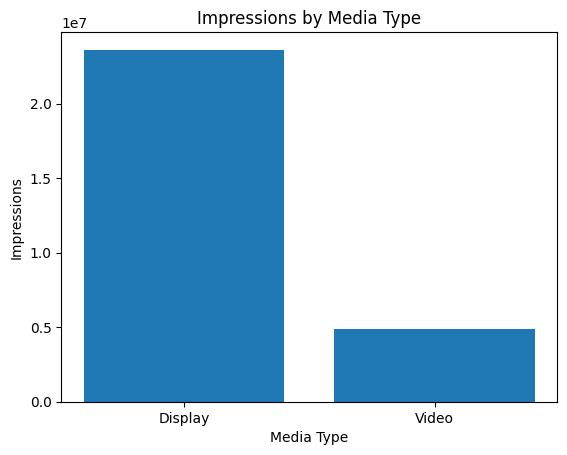

In [ ]:
# Grafico que muestra numero de 'Impressions' por 'Media Type'

import matplotlib.pyplot as plt

# Agrupe los datos por tipo de medio y sume las impresiones
grouped_df = k_data.groupby('Media Type')['Impressions'].sum()

# Crear un gráfico de barras
plt.bar(grouped_df.index, grouped_df.values)

# Establecer el título y las etiquetas de los ejes
plt.title('Impressions by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Impressions')

# Mostrar el grafico
plt.show()


In [ ]:
# Identificar el 'Media Type' con el mayor numero de impresiones
media_type_max = grouped_df.sort_values(ascending=False).index[0]

# Imprimir el resultado
print(f"Media Type con mayor numero de impresiones: {media_type_max}")

Media Type con mayor numero de impresiones: Display


#3. Usando comandos de python, determina el top 10 de ciudades donde fueron más exitosas las campañas.

Para determinar el top de las 10 ciudades en donde fueron mas exitosas las campañas, usaremos el indicador Click Through Rate

                          𝐶𝑇𝑅=(𝐶𝑙𝑖𝑐𝑘𝑠/𝐼𝑚𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛𝑠)×100

El Click-Through Rate (CTR) es un indicador clave utilizado en marketing digital para medir la efectividad de una campaña publicitaria en términos de la proporción de usuarios que hacen clic en un enlace o anuncio después de verlo (es decir, hacen clic en relación con el número de impresiones generadas).

In [ ]:
# Calcular Click Through Rate basado en los datos de Clicks e Impressions registrados en el dataset
k_data['success_metric'] = (k_data['Clicks']/k_data['Impressions'])*100

# Establecemos el top de las 10 ciudades donde fueron mas exitosas las campañas
top_cities = k_data.groupby('City')['success_metric'].sum().sort_values(ascending=False).head(10)

# Generamos la tabla donde se presenta de forma organizada el top 10 de ciudades en donde fueron mas exitosas las campañas
top_cities = k_data.groupby('City')['success_metric'].sum().sort_values(ascending=False).head(10).reset_index()
top_cities.columns = ['City', 'Success Rate']
print(top_cities)

                                        City  Success Rate
0                                  Matamoros   2188.791336
1                            Emiliano Zapata   1707.758754
2                                     Loreto   1600.746305
3                                   Cardenas   1579.477471
4                               Ciudad Acuna   1507.423816
5  San Jose Guadalupe,State of Mexico,Mexico   1463.562630
6                                 Los Mochis   1462.368247
7                                    Miramar   1455.376276
8                                 Huatabampo   1429.247472
9                                     Colima   1399.196244


# 4. Dentro del Insertion Order se puede identificar el KPI objetivo de la campaña (CPM, CPC, CPCV) así como el formato del anuncio (RichMedia, StandarBanners, VideoIntegrado, SONA). Teniendo en cuenta la siguiente tabla calcular la inversión de cada una de las Insertion Order

In [ ]:
# ver los valores unicos dentro de la columna Insertion order

unique_insertion_orders = k_data['Insertion Order'].unique()

print(unique_insertion_orders)

['Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-JUN_Hosted_MOAT_CPM_RichMedia_Playeable_Kids'
 'Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-JUN_Hosted_MOAT_CPM_RichMedia_Playeable_Parents'
 'Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-JUN_Hosted_MOAT_CPM_StandarBanners_Parents'
 'Media_2023_MarcaA_Desayuno-Kids_Branding_Xaxis_JUN_Sizmek_MOAT_VideoIntegrado_CPCV'
 'Media_2023_MarcaA_Desayuno-Padres_Branding_Xaxis_MAY-JUN_Sizmek_MOAT_VideoIntegrado_CPCV'
 'Media_2023_MarcaA_Mecato_Branding_Xaxis_JUN-JUL_NOMOAT_StandarBanners_CPM'
 'Media_2023_MarcaA_Merienda-Deals_Xaxis_JUL_Hosted_NOMOAT_VideoIntegrado_CPCV'
 'Media_2023_MarcaA_Merienda_Xaxis_JUL_Hosted_NOMOAT_SONA_CPM'
 'Media_2023_MarcaA_Merienda-Deals_Xaxis_AGO_Hosted_NOMOAT_VideoIntegrado_CPCV'
 'Media_2023_MarcaA_Mecato-FreeFire_Branding_Xaxis_AGO_NOMOAT_SONA_CPC'
 'Media_2023_MarcaA_Merienda-Deals_Xaxis_SEP_Hosted_NOMOAT_VideoIntegrado_CPCV'
 'Media_2023_MarcaA_Merienda-Deals_Xaxis_OCT_Hosted_NOMOAT_VideoIntegrado_CPCV']


In [ ]:
# Cree una nueva columna dentro de la tabla que identifique los registros basado en la columna 'Insertion Order' con los indicadores CPM, CPC y CPCV, precisamente basado si el registro dentro de la columna mencionada contiene 'CPM', 'CPC' o CPCV

def identify_kpis(insertion_order):
  if 'CPM' in insertion_order:
    return 'CPM'
  elif 'CPC' in insertion_order:
    return 'CPC'
  elif 'CPCV' in insertion_order:
    return 'CPCV'
  else:
    return None

k_data['KPI'] = k_data['Insertion Order'].apply(identify_kpis)


In [ ]:
# Cree una nueva columna con el nombre 'FORMATO' dentro de la tabla que identifique los registros basado en la columna 'Insertion Order' dependiendo si el registro contiene las palabras RichMedia, SONA, StandarBanners o VideoIntegrado

def identify_format(insertion_order):
  if 'RichMedia' in insertion_order:
    return 'RichMedia'
  elif 'SONA' in insertion_order:
    return 'SONA'
  elif 'StandarBanners' in insertion_order:
    return 'StandarBanners'
  elif 'VideoIntegrado' in insertion_order:
    return 'VideoIntegrado'
  else:
    return None

k_data['FORMATO'] = k_data['Insertion Order'].apply(identify_format)


In [ ]:
# Función para calcular el costo según las condiciones dadas
def calcular_costo(row):
    if row['KPI'] == 'CPM':
        if row['FORMATO'] == 'RichMedia':
            return (10 / 1000) * row['Impressions']
        elif row['FORMATO'] == 'SONA':
            return (5 / 1000) * row['Impressions']
        elif row['FORMATO'] == 'StandarBanners':
            return (3 / 1000) * row['Impressions']
    elif row['KPI'] == 'CPCV':
        if row['FORMATO'] == 'VideoIntegrado':
            return 0.03 * row['Complete Views']
    elif row['KPI'] == 'CPC':
        if row['FORMATO'] == 'SONA':
            return 10 * row['Clicks']

    # Retornar None para cualquier combinación no especificada
    return None

# Aplicar la función para calcular 'COSTO' y asignarlo a una nueva columna en el DataFrame
k_data['COSTO'] = k_data.apply(calcular_costo, axis=1)

# Mostrar el DataFrame resultante con la nueva columna 'COSTO'
k_data.head()

,Date,Campaign,Insertion Order,Creative,Creative Size,Media Type,City,Impressions,Clicks,TrueView: Views,Complete Views (Video),success_metric,KPI,FORMATO,COSTO
0,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acajete,1,0,0,0,0.0,CPM,RichMedia,0.01
1,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acambaro,6,0,0,0,0.0,CPM,RichMedia,0.06
2,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acapulco,2,0,0,0,0.0,CPM,RichMedia,0.02
3,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apatzingan,1,0,0,0,0.0,CPM,RichMedia,0.01
4,2023/06/02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apodaca,2,0,0,0,0.0,CPM,RichMedia,0.02


In [ ]:
# seleccione del dataset k_data las columnas Insertion Order y Costo

k_data[['Insertion Order', 'COSTO']] # La columna 'Costo' hace referencia a la inversion asociada a cada uno de los 'Insertion Order'

,Insertion Order,COSTO
0,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,0.01
1,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,0.06
2,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,0.02
3,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,0.01
4,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,0.02
...,...,...
345409,Media_2023_MarcaA_Merienda-Deals_Xaxis_OCT_Hos...,NaN
345410,Media_2023_MarcaA_Merienda-Deals_Xaxis_OCT_Hos...,NaN
345411,Media_2023_MarcaA_Merienda-Deals_Xaxis_OCT_Hos...,NaN
345412,Media_2023_MarcaA_Merienda-Deals_Xaxis_OCT_Hos...,NaN


#5. Usando comandos de python, determina a partir de los datos el comportamiento de la media de impresiones por día de todas las campañas.

In [ ]:
# Crear un nuevo dataset en donde agrupe 'Campaign' por 'Date', y calcule la media de impresiones de cada campaign por date

import pandas as pd

# Agrupar los datos por 'Campaña' y 'Fecha'
grouped_data = k_data.groupby(['Campaign', 'Date'])

# Calcular la media de 'Impresiones' para cada grupo
mean_impressions = grouped_data['Impressions'].mean()

# Crear un nuevo DataFrame con los resultados.
campaigns_mean_data = pd.DataFrame(mean_impressions)

campaigns_mean_data = campaigns_mean_data.rename(columns={'Impressions': 'mean_impressions'})

# Imprimir el DataFrame
campaigns_mean_data.head(10)

mean_impressions
Campaign                                      Date                        
Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR 2023/06/02         65.024859
                                              2023/06/03         44.495892
                                              2023/06/04         49.421417
                                              2023/06/05         54.124054
                                              2023/06/06         58.682123
                                              2023/06/07         55.525029
                                              2023/06/08         59.777671
                                              2023/06/09         62.104595
                                              2023/06/10         58.789177
                                              2023/06/11         59.577323

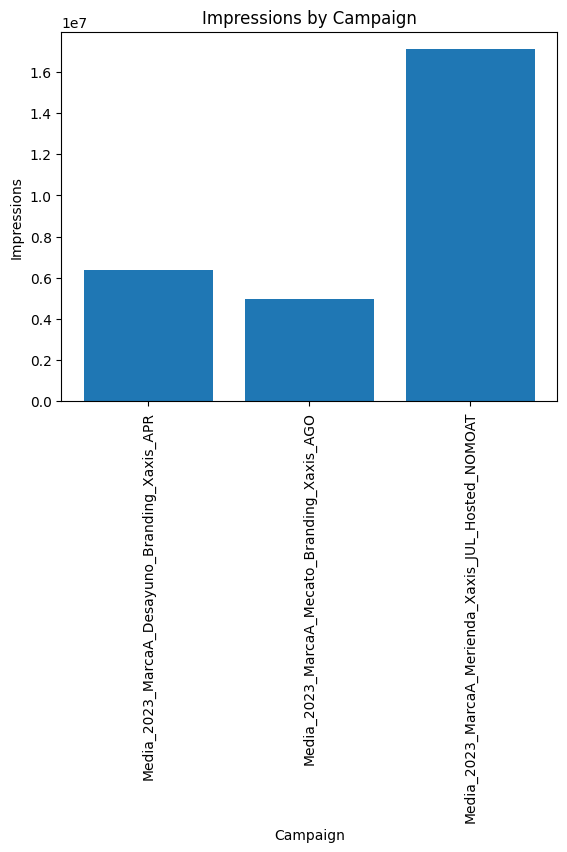

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar los datos por 'Campaign'
grouped_data = k_data.groupby('Campaign')['Impressions'].sum()

# Crear un gráfico de barras
x_vals = np.arange(len(grouped_data))
plt.bar(x_vals, grouped_data.values)

# Establecer el título y las etiquetas de los ejes
plt.title('Impressions by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Impressions')

# Rotar las etiquetas del eje x para que se vean de forma clara
plt.xticks(x_vals, grouped_data.index, rotation=90)

# Mostrar el grafico
plt.show()


In [ ]:
# Identificamos las Campañas presentes dentro del dataset

unique_campaigns = k_data['Campaign'].unique()

print(unique_campaigns)

['Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR'
 'Media_2023_MarcaA_Mecato_Branding_Xaxis_AGO'
 'Media_2023_MarcaA_Merienda_Xaxis_JUL_Hosted_NOMOAT']


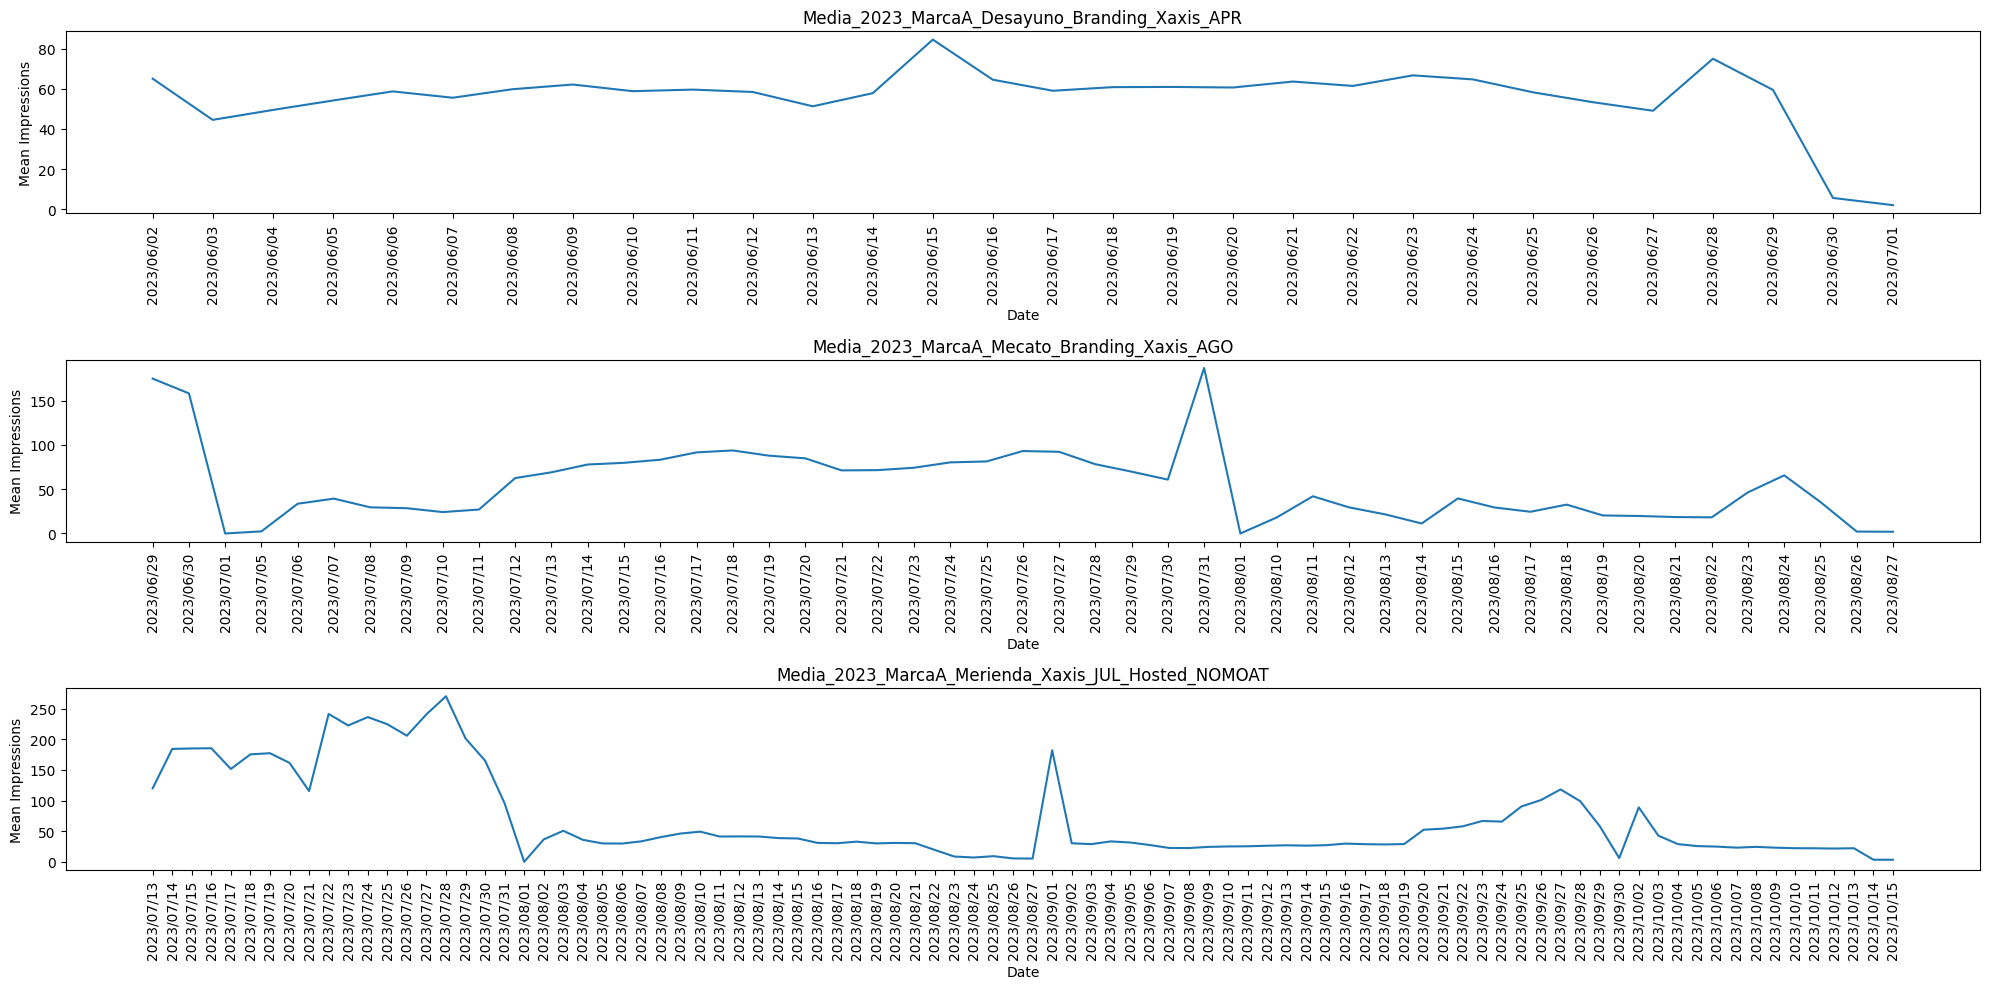

In [ ]:
import matplotlib.pyplot as plt
# Restablecer el índice para crear columnas regulares 'Campaña' y 'Fecha'
campaigns_mean_data_reset = campaigns_mean_data.reset_index()

# Crear una figura del comportamiento de la media de Impresiones
fig, axes = plt.subplots(nrows=len(campaigns_mean_data_reset['Campaign'].unique()), figsize=(20, 10))

# Iterar sobre sobre cada campaña y graficar la data
for i, campaign in enumerate(campaigns_mean_data_reset['Campaign'].unique()):
    # Filtrar la data por cada campaña
    campaign_data = campaigns_mean_data_reset[campaigns_mean_data_reset['Campaign'] == campaign]

    # Graficar la data
    axes[i].plot(campaign_data['Date'], campaign_data['mean_impressions'])
    axes[i].set_title(campaign)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Mean Impressions')

    # Rotar las etiquetas del eje x a 90 grados
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=90)

# Adjustar el espacio entre subplots
plt.tight_layout()
# Mostrar las graficas
plt.show()

# 6. Guarda en un txt el consumo diario de la “Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR”

In [ ]:
# Crear un nuevo dataset que contenga dos columnas, una con las fechas de la columna 'Date' y otra con los costos de “Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR"

# Filtrar el marco de datos k_data para incluir solo filas donde 'Campaña' sea igual a "Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR"
filtered_data = k_data[k_data['Campaign'] == "Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR"]

# Filtre el marco de datos k_data para incluir solo filas donde 'Campaña' sea igual a "Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR"

Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario = filtered_data[['Date', 'COSTO']]

# Print the new DataFrame
Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario.head()

,Date,COSTO
0,2023/06/02,0.01
1,2023/06/02,0.06
2,2023/06/02,0.02
3,2023/06/02,0.01
4,2023/06/02,0.02


In [ ]:
# guardar Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario en un txt, y guardarlo en Drive

import os
from google.colab import drive

# Crear un nuevo archivo de texto en el directorio actual
with open('Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario.txt', 'w') as f:
  # Escriba el contenido del marco de datos new_dataset1 en el archivo
  f.write(Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario.to_string())

# Mount Google Drive
drive.mount('/content/drive')

# Copie el archivo new_dataset1.txt a Google Drive
!cp Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR_consumo_diario.txt /content/drive/MyDrive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert the DataFrame to a CSV string
csv_string = k_data.to_csv(index=False)

# Import the necessary module to interact with Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the new CSV file on Google Drive
output_file_path = '/content/drive/MyDrive/k_data.csv'

# Write the CSV string to the new file
with open(output_file_path, 'w') as f:
    f.write(csv_string)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 7. Dashboard (PowerBI)

# 8. Opcionales

#La idea con el siguiente ejercicio es probar correr y entrenar un modelo de regresion lineal para predecir la cantidad de impresiones que puede llegar a tener una campaña, dada ciertas características y así saber donde optimizar recursos y bajo que contexto.
Sobre los csv entregados, se crearán diversas features extras para tratar de generar riqueza y mayor información en el modelo
Se usaran también distintos metodos de selcción de variables, como reducción de dimensionalidad con PCA y también aplicando un Random Forest seleccionando el top de variables para luego ejecutarlas en la regresión

In [ ]:
k_data.columns = k_data.columns.str.strip().str.replace(' ', '_').str.upper()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creamos algunas variables extras que pueden sumar valor a la regresion para predecir la cantidad de impresiones que puede llegar a tener una campaña especifica

In [ ]:
# Variables de fecha
# Sacamos columnas de fechas

k_data['DATE'] = pd.to_datetime(k_data['DATE'])
k_data['DAY_WEEK'] = k_data['DATE'].dt.dayofweek
k_data['MONTH'] = k_data['DATE'].dt.month
k_data['QUARTER'] = k_data['DATE'].dt.quarter
k_data['YEAR'] = k_data['DATE'].dt.year
k_data['ISWEEKEND'] = k_data['DATE'].dt.dayofweek >= 5

# Variables de interacción

k_data['CAMPAIGN_CITY'] = k_data['CAMPAIGN'] + '_' + k_data['CITY']
k_data['TYPE_CREATIVE_SIZE'] = k_data['MEDIA_TYPE'] + '_' + k_data['CREATIVE_SIZE']

# Variables de agregaciones
# Suma por campaña y ciudad
k_data['CLICKS_CAMPAIGN_CITY'] = k_data.groupby(['CAMPAIGN', 'CITY'])['CLICKS'].transform('sum')
k_data['CLICKS_CAMPAIGN_CITY'] = k_data.groupby(['CAMPAIGN', 'CITY'])['CLICKS'].transform('mean')
k_data['CLICKS_CAMPAIGN_CITY'] = k_data.groupby(['CAMPAIGN', 'CITY'])['CLICKS'].transform('median')

# construimos algunos ratios y porcentajes
k_data['CTR'] = k_data['CLICKS'] / k_data['IMPRESSIONS']
k_data['VIEW_RATE'] = k_data['COMPLETE_VIEWS_(VIDEO)'] / k_data['IMPRESSIONS']

# Codificación One-Hot
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(k_data[['CAMPAIGN', 'MEDIA_TYPE', 'CITY']]).toarray()
encoded_feature_names = one_hot_encoder.get_feature_names_out(['CAMPAIGN', 'MEDIA_TYPE', 'CITY'])

df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)
k_data = pd.concat([k_data, df_encoded], axis=1)

# Codificación de Frecuencia por ciudad y campañas
k_data['CAMPAIGN_FREQ'] = k_data['CAMPAIGN'].map(k_data['CAMPAIGN'].value_counts())
k_data['CITY_FREQ'] = k_data['CITY'].map(k_data['CITY'].value_counts())

# Tendencias y estacionalidad
#k_data['CumulativeImpressions'] = k_data['Impressions'].cumsum()
k_data['CUMULATIVE_CLICKS'] = k_data['CLICKS'].cumsum()

# Rezagos
k_data['CLICKS_LAG'] = k_data['CLICKS'].shift(1)


k_data.head()

,DATE,CAMPAIGN,INSERTION_ORDER,CREATIVE,CREATIVE_SIZE,MEDIA_TYPE,CITY,IMPRESSIONS,CLICKS,TRUEVIEW:_VIEWS,...,CITY_Zaragoza,CITY_Zimapan,CITY_Zinacatepec,CITY_Zitacuaro,CITY_Zumpango,CITY_Zurich,CAMPAIGN_FREQ,CITY_FREQ,CUMULATIVE_CLICKS,CLICKS_LAG
0,2023-06-02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acajete,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,107386,481,0,NaN
1,2023-06-02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acambaro,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,107386,653,0,0.0
2,2023-06-02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Acapulco,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,107386,1066,0,0.0
3,2023-06-02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apatzingan,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,107386,767,0,0.0
4,2023-06-02,Media_2023_MarcaA_Desayuno_Branding_Xaxis_APR,Media_2023_MarcaA_Desayuno_Branding_Xaxis_MAY-...,Media_2023_MarcaA_Desayuno_Pops-Kids_Mraid_02jun,320x480,Display,Apodaca,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,107386,1117,0,0.0


In [ ]:
k_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345414 entries, 0 to 345413
Columns: 716 entries, DATE to CLICKS_LAG
dtypes: bool(1), datetime64[ns](1), float64(693), int32(4), int64(7), object(10)
memory usage: 1.8+ GB


In [ ]:
# imputacion simple de datos faltantes con la media para columnas numéricas
numeric_columns = k_data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    k_data[col].fillna(k_data[col].mean())

In [ ]:
# Imputación de la moda para columnas categóricas
categorical_columns = k_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    k_data[col].fillna(k_data[col].mode()[0])

In [ ]:
k_data.shape

(345414, 716)

In [ ]:
k_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345414 entries, 0 to 345413
Columns: 716 entries, DATE to CLICKS_LAG
dtypes: bool(1), datetime64[ns](1), float64(693), int32(4), int64(7), object(10)
memory usage: 1.8+ GB
